## Feature Selection — Filtering Methods

In this section, we focus on **filtering methods sing statistical criteria** for feature selection.  
Filtering methods evaluate features **independently of any predictive model**, using statistical criteria derived directly from the data. Unlike wrapper and embedded methods, filters are **model-agnostic**, computationally efficient, and scale well to high-dimensional settings.

The primary goal of filtering is **not dimensionality reduction for efficiency**, but the removal of **irrelevant, redundant, or weakly informative features** before modeling. This makes filtering methods particularly suitable as:

- an initial screening step,
- a preprocessing stage in pipelines,
- or a baseline against more complex selection strategies.

---

## Statistics and Ranking Methods

This notebook introduces **statistical and ranking-based filter methods**, which score each feature individually based on its relationship with the target variable. These methods assume **no interaction between features** and evaluate relevance in a univariate manner.

Despite their simplicity, statistical ranking methods remain widely used in practice due to their:

- interpretability,
- stability,
- low computational cost,
- and effectiveness as a first-pass feature screening tool.

The following families of statistical and ranking methods are covered:

#### 1. Information-Theoretic Methods

These methods measure how much information a feature provides about the target.

- **Information Gain**
- **Mutual Information**

They are particularly useful for:

- classification problems,
- non-linear dependencies,
- and discrete or discretized features.

---

#### 2. Fisher Score and Variance-Based Criteria

These methods assess class separability by comparing:

- between-class variance
- to within-class variance

The **Fisher score** favors features that:

- have well-separated class means,
- and low intra-class variability.

---

#### 3. Univariate Statistical Hypothesis Tests

These methods test whether a feature is statistically associated with the target variable.

Common examples include:

- t-tests and ANOVA (classification),
- chi-square tests (categorical data),
- correlation and F-tests (regression).

Feature relevance is quantified using:

- test statistics,
- or p-values.

---

#### 4. Univariate Predictive Performance Metrics

These methods evaluate each feature using a **single-feature predictive model**, scored via a task-specific metric.

Examples include:

- **Univariate AUC (ROC-AUC)** for classification,
- **Univariate RMSE or R²** for regression.

Each feature is treated as a standalone predictor, and its score reflects its **individual predictive power**.

---

### Key Assumptions and Limitations

While effective, statistical and ranking methods rely on important assumptions:

- Features are evaluated **independently**
- Feature interactions are **ignored**
- Redundant features may still receive high scores

As a result, these methods are best used as:

- an initial filtering step,
- or in combination with embedded or wrapper methods.


---
### Mutual Information

Mutual Information between two random variables X and Y is defined as:

$$
I(X; Y)
=
\sum_{x \in \mathcal{X}}
\sum_{y \in \mathcal{Y}}
p_{XY}(x, y)
\log
\left(
\frac{p_{XY}(x, y)}{p_X(x)\, p_Y(y)}
\right)
$$



- I(X;Y): Mutual Information between feature X and target Y
- p_XY​(x,y): Joint probability distribution of X and Y
- p_X(x): Marginal probability distribution of X
- p_Y(y): Marginal probability distribution of Y


For discrete variables, the computation of Mutual Information begins by enumerating all possible values of the feature 𝑋 and the target 𝑌. For example, if both 𝑋 and 𝑌 are binary variables, their possible values are {0,1}. The marginal probability 𝑝𝑋( 0 ) is computed as the number of samples for which the feature takes the value 0 divided by the total number of samples, while 𝑝𝑋(1) is computed as the number of samples equal to 1 divided by the total sample size. The same procedure is applied to the target variable to obtain 𝑝𝑌(0) and 𝑝𝑌(1). To compute the joint probabilities 𝑝𝑋𝑌 (𝑥, 𝑦), we count how many samples simultaneously satisfy a specific combination of feature and target values, such as 𝑋 = 0 X=0 and 𝑌 = 1 Y=1, or 𝑋 = 1 X=1 and 𝑌 = 0 Y=0, and divide each count by the total number of samples. These marginal and joint probabilities are then substituted into the Mutual Information formula to quantify the dependency between the feature and the target.

---

Once we have a **score for each feature** (e.g., mutual information), we need a systematic way to **select the top features**.

#### 1. SelectKBest

- **Purpose:** Keep the top `k` features according to a scoring function.
- **Usage:** `SelectKBest(score_func, k)`
- **Example:**

```python
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Classification example
selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_selected = selector.fit_transform(X, y)
```

Why use it:

- Focuses only on the most informative features.

- Reduces dimensionality without relying on a model.

- Fast and interpretable.

#### 2. SelectPercentile

- **Purpose:** Keep the top p% of features based on scores.

- **Usage:** `SelectPercentile(score_func, percentile)`

- **Example:**

```python

from sklearn.feature_selection import SelectPercentile, mutual_info_regression

# Regression example
selector = SelectPercentile(score_func=mutual_info_regression, percentile=20)
X_selected = selector.fit_transform(X, y)
```

Why use it:

- Flexible when the total number of features is very high.

- Ensures a relative proportion of features is kept regardless of dataset size.

- Works well with univariate scoring methods like MI, Fisher score, or correlation-based measures.


In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import (
    mutual_info_classif,
    mutual_info_regression,
    SelectKBest,
    SelectPercentile
)

In [38]:
df = load_breast_cancer()

X = pd.DataFrame(data=df.data, columns=df.feature_names)
y = pd.DataFrame(data=df.target)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

### Mutual Information Classification


In [55]:
mi = mutual_info_classif(
    X = X_train,
    y = y_train,
    discrete_features=False,
    n_neighbors=3,
    random_state=42
    )

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mi
    }).sort_values(by='Mutual Information', ascending=False)

mi_df

,Feature,Mutual Information
22,worst perimeter,0.466425
7,mean concave points,0.440368
23,worst area,0.439051
20,worst radius,0.433220
27,worst concave points,0.431108
2,mean perimeter,0.388744
6,mean concavity,0.354985
3,mean area,0.338778
0,mean radius,0.323539
13,area error,0.315186


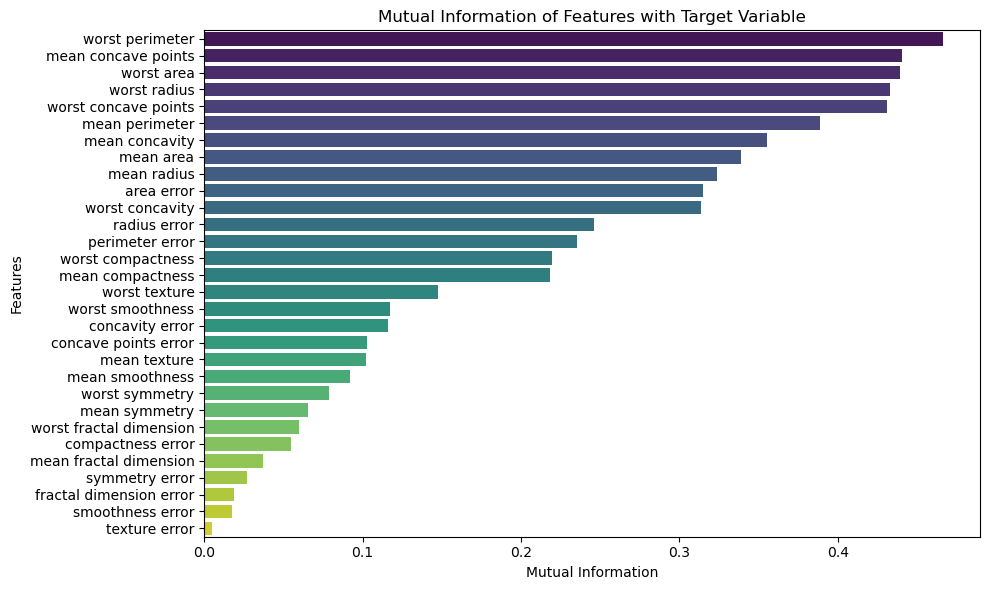

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=mi_df,
    x='Mutual Information',
    y='Feature',
    palette='viridis'
    )
plt.title('Mutual Information of Features with Target Variable')
plt.xlabel('Mutual Information')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

We can manually select the top `k=10` features based on mutual information scores.  
However, using **`SelectKBest`** automates this process and provides several advantages:

| Manual Selection                                 | SelectKBest                                                            |
| ------------------------------------------------ | ---------------------------------------------------------------------- |
| Must sort MI values manually                     | Automatically computes scores, ranks features, and selects the top `k` |
| Extra code needed to map indices to column names | `get_support()` returns a clean Boolean mask for column selection      |
| Difficult to integrate into pipelines            | Works seamlessly within scikit-learn pipelines                         |
| Harder to reproduce                              | Fully compatible with cross-validation and grid search                 |

**Key takeaway:** `SelectKBest` makes feature selection **faster, cleaner, and more reproducible**, while also being **pipeline-friendly**.


In [43]:
selector = SelectKBest(mutual_info_classif, k=10)

selector.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest(score_func=<function mutual_info_classif at 0x3103c16c0>)

In [44]:
# store the columns name
selected_features = X_train.columns[selector.get_support()]
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'worst radius', 'worst perimeter', 'worst area',
       'worst concavity', 'worst concave points'],
      dtype='object')


In [45]:
X_train = selector.transform(X_train)
X_train = X_test = selector.transform(X_test)

In [46]:
X_train.shape

(114, 10)

### Mutual Information Regression


In [51]:
df = load_diabetes()

X = pd.DataFrame(data=df.data, columns=df.feature_names)
y = pd.DataFrame(data=df.target)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [56]:
mi = mutual_info_regression(
    X = X_train,
    y = y_train,
    discrete_features=False,
    n_neighbors=3,
    random_state=42
    )

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mi
    }).sort_values(by='Mutual Information', ascending=False)

mi_df

,Feature,Mutual Information
2,bmi,0.281084
8,s5,0.199034
7,s4,0.126175
9,s6,0.120421
3,bp,0.075573
5,s2,0.070147
6,s3,0.043302
1,sex,0.029739
0,age,0.000000
4,s1,0.000000


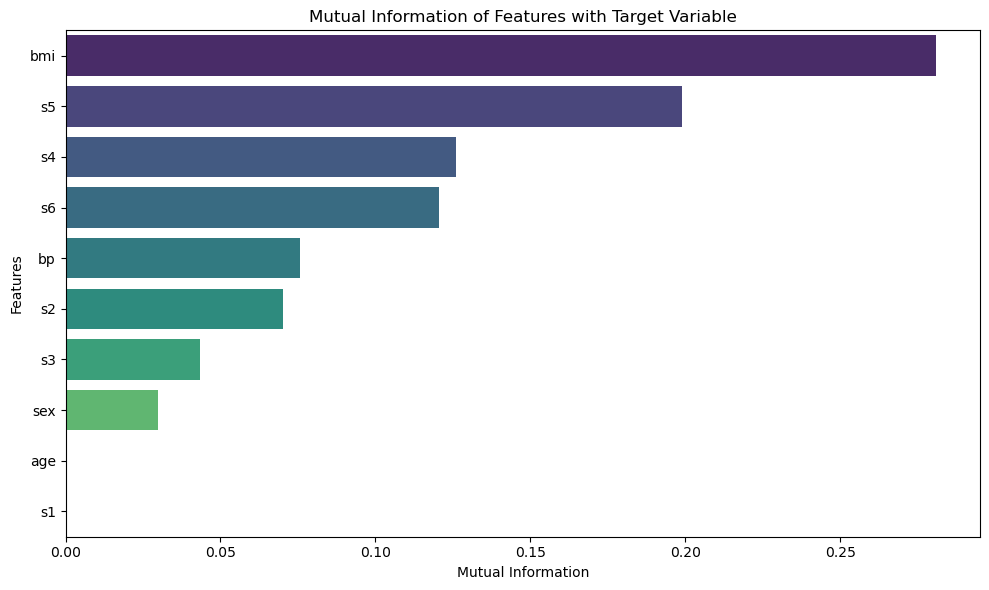

In [58]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=mi_df,
    x='Mutual Information',
    y='Feature',
    palette='viridis'
    )
plt.title('Mutual Information of Features with Target Variable')
plt.xlabel('Mutual Information')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [59]:
# using SelectKBest with mutual_info_regression

selector = SelectKBest(mutual_info_regression, k=5)
selector.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest(k=5, score_func=<function mutual_info_regression at 0x3103c1440>)

In [60]:
selected_features = X_train.columns[selector.get_support()]
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['bmi', 'bp', 's4', 's5', 's6'], dtype='object')


In [61]:
X_train = selector.transform(X_train)
X_test = selector.transform(X_test)

In [62]:
X_train.shape

(353, 5)

### SelectPercentile


In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [71]:
selector = SelectPercentile(
    score_func=mutual_info_regression,
    percentile=10,
)

selector.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectPercentile(score_func=<function mutual_info_regression at 0x3103c1440>)

In [72]:
selected_features = X_train.columns[selector.get_support()]
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['bmi'], dtype='object')


In [73]:
X_train = selector.transform(X_train)
X_test = selector.transform(X_test)

In [74]:
X_train.shape

(353, 1)

In [86]:
# validation 1

f"{(selector.get_support().sum() / len(selector.get_support()))*100} %"

'10.0 %'

In [91]:
# validation 2

threshold = np.percentile(mi, 100 - 10)
print(f"threshold: {threshold}")
print("="*70)
selected_features = mi_df[mi_df['Mutual Information'] >= threshold]
print("Selected Features based on threshold:")
print(selected_features)
print("="*70)
print(f"Percent of features selected: {(len(selected_features) / len(mi_df))*100} %")


threshold: 0.20723909594241646
Selected Features based on threshold:
  Feature  Mutual Information
2     bmi            0.281084
Percent of features selected: 10.0 %
